In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from scipy.sparse.linalg import svds
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class SVD():
    def __init__(self,ratingMatrix, features):
        self.ratingMatrix = ratingMatrix    # index starts from 1
        self.features = features
        self.zscore = pd.DataFrame([])
        self.U, self.sigma,  self.V = None, None, None
        self.predicted_UserItemRating = pd.DataFrame([])  # index starts from 0

    def calcSVD(self,):
        m,n = self.ratingMatrix.shape
        print(m,n)
        for i in range(n):
            self.zscore[self.ratingMatrix.columns[i]] = (self.ratingMatrix.iloc[:,i] - self.ratingMatrix.iloc[:,i].mean())/self.ratingMatrix.iloc[:,i].std(ddof=0)
        self.zscore = self.zscore.fillna(0)
        print("After Z-Score\n",self.zscore.head(5))

        self.U, self.sigma,  self.V = svds(self.zscore, k = self.features)
        new_ratingMatrix = pd.DataFrame(np.round(np.matrix(self.U)*np.diag(self.sigma)*np.matrix(self.V),3))
        new_ratingMatrix.head(5)
        
        m,n = new_ratingMatrix.shape
        print(m,n)
        for i in range(n):
            self.predicted_UserItemRating[self.ratingMatrix.columns[i]] = (new_ratingMatrix.iloc[:,i] * self.ratingMatrix.iloc[:,i].std(ddof=0)) + self.ratingMatrix.iloc[:,i].mean()
        print("Done")

    def topRatedItems(self,targetUser, nItems):
        print(targetUser, nItems)
        targetPredictedRatings = self.predicted_UserItemRating.iloc[[targetUser]].transpose().sort_values(ascending = False, by = targetUser).head(nItems)
        print(targetPredictedRatings)
        return(list(targetPredictedRatings.index))

    def topNSimilarItem(self,targetItem, nSimilar):
        itemFeatureMatrix = (self.V).T
        # print(itemFeatureMatrix)
        rows, cols =itemFeatureMatrix.shape
        # print(rows,cols)
        s = np.zeros(rows)
        # print(s)
        s[targetItem] = 1
        attr1 = itemFeatureMatrix[targetItem] - np.mean(itemFeatureMatrix[targetItem])
        dem1 = np.sqrt(np.sum(np.square(attr1)))
        for i in range (rows):
            if i != targetItem:
                attr2 = itemFeatureMatrix[i] - np.mean(itemFeatureMatrix[i])
                # print(attr1,attr2)
                num = np.sum(attr1 * attr2)
                dem2 = np.sqrt(np.sum(np.square(attr2)))
                # print("--",num,dem1*dem2)
                if dem1==0 or dem2==0:
                    s[i]=0
                else:
                    s[i] = num / (dem1* dem2)
        # print(s)
        simDF = pd.DataFrame(s)
        simDF = simDF.sort_values(ascending = False, by = 0).head(nSimilar+1)
        print(simDF)
        return(list(simDF.index))
        

In [ ]:
UserItemRating = pd.read_csv('/content/drive/My Drive/FinalYearProj-2020/csvFiles/Movielens Dataset/UserMovieRatings.csv',index_col=0)
UserItemRating.columns.name = 'Item'
UserItemRating.head()

Item,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
UserItemRating.shape

(610, 9724)

***Warning: This step is only for checking purpose***

In [ ]:
l=[10,30,50,100,150,200,250,300,350,400,450,500]
k = []
for j in l:
    svdObj = SVD(UserItemRating,j)
    svdObj.calcSVD()
    count=0
    for i in range(len(vald)):
        row_data = ratings.iloc[i]
        user = int(row_data['userId'])
        movie = str(int(row_data['movieId']))
        rating = row_data['rating']
        # print(svdObj.predicted_UserItemRating[movie][user] , " ",rating)
        if abs(svdObj.predicted_UserItemRating[movie][user] - rating) <=1:
            count+=1 

    # print("Eff {}".format(count*100/len(vald)))
    k.append(count*100/len(vald))

print("finished")

for i in range(len(l)):
    print("{} => {}".format(l[i],k[i]))

# svdObj.predicted_UserItemRating.head(10)

***RESULT : Best choice of number of feature: 50***

In [ ]:
svdObj = SVD(UserItemRating,50)
svdObj.calcSVD()
print("finished")

610 9724
After Z-Score
                1    2         3    4  ...  193583  193585  193587  193609
UserID                                ...                                
1       0.094931  0.0  0.708752  0.0  ...     0.0     0.0     0.0     0.0
2       0.000000  0.0  0.000000  0.0  ...     0.0     0.0     0.0     0.0
3       0.000000  0.0  0.000000  0.0  ...     0.0     0.0     0.0     0.0
4       0.000000  0.0  0.000000  0.0  ...     0.0     0.0     0.0     0.0
5       0.094931  0.0  0.000000  0.0  ...     0.0     0.0     0.0     0.0

[5 rows x 9724 columns]
610 9724
Done
finished


In [ ]:
recommendedItems = svdObj.topRatedItems(100,10)
print("Recommended Items : ",recommendedItems)

In [ ]:
svdObj.topNSimilarItem(1,20)

In [ ]:
path = '/content/drive/My Drive/FinalYearProj-2020/DataSets/Movielens/'
ratings = pd.read_csv(path+'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


###Splitting Dataset###

In [ ]:
np.random.seed = 42
msk = np.random.rand(len(ratings)) < 0.8
# self.trn = self.ratings[msk]
vald = ratings[~msk]
vald.shape



(20294, 4)

In [ ]:
for i in range(len(vald)):
    row_data = ratings.iloc[i]
    # print(row_data)
    user = int(row_data['userId'])
    movie = str(int(row_data['movieId']))
    # break
    UserItemRating[movie][user] = np.nan

In [ ]:
count=0
error = []
for i in range(len(vald)):
    row_data = ratings.iloc[i]
    user = int(row_data['userId'])
    movie = str(int(row_data['movieId']))
    rating = row_data['rating']
    # print(svdObj.predicted_UserItemRating[movie][user] , " ",rating)
    # error.append(abs(svdObj.predicted_UserItemRating[movie][user] - rating))
    err = abs(svdObj.predicted_UserItemRating[movie][user] - rating)
    if abs(svdObj.predicted_UserItemRating[movie][user] - rating) <=1:
        count+=1 

    if err>=0 or err<=5:
        error.append(err)

print("Eff {}".format(count*100/len(vald)))
print("mse: ", np.mean(np.square(error)))

Eff 69.07953089583128
mse:  0.9946481584204703


In [ ]:
error

***Recommendation work***

#####Tesing kNN#####

In [ ]:
# sample = [
#           [1,2,3,4],
#           [2,1,5,2],
#           [0.7,1.9,1.5,2.6],
#           [1.1,0,4,2],
#           [5,4,3,2]
# ]



neigh = NearestNeighbors(metric='euclidean')
neigh.fit(svdObj.V.T)
# svdObj.V.T.shape

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
# Get a movie id
movieId=0

k_vs_avgdis = {}

movie_feature = svdObj.V.T[movieId]
for i in range(2,100,3):
    dis, k_neighbor = neigh.kneighbors([movie_feature], n_neighbors=i, return_distance=True)
    # print(dis)
    avg_dis = np.mean(dis.flatten())
    k_vs_avgdis[i]=avg_dis


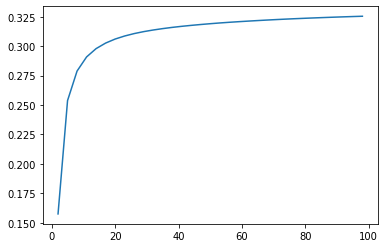

In [ ]:
plt.plot(list(k_vs_avgdis.keys()), list(k_vs_avgdis.values()))
plt.show()

***K value gives good result between 10 to 23***

In [ ]:
np.sqrt(np.sum(np.square(np.array(sample[3])-np.array(sample[1]))))/4

0.41907636535600523

***KNN TEST for User***

In [ ]:
userKNNObj = NearestNeighbors(metric='euclidean')
userKNNObj.fit(svdObj.U)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
# Get a movie id
userid=5

k_vs_avgdis = {}

user_feature = svdObj.U[userid]
for i in range(2,50,5):
    dis, k_neighbor = userKNNObj.kneighbors([user_feature], n_neighbors=i, return_distance=True)
    # print(dis)
    avg_dis = np.mean(dis.flatten())
    k_vs_avgdis[i]=avg_dis

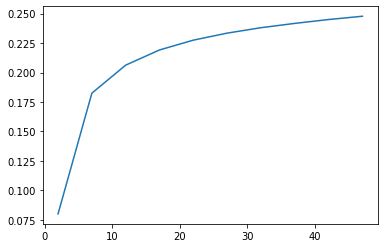

In [ ]:
plt.plot(list(k_vs_avgdis.keys()), list(k_vs_avgdis.values()))
plt.show()

*****Good Values range from 7-12*****

***MovieId Translator***

In [ ]:
movieId_translator=list(UserItemRating.keys())
userId_translator = list(range(1,611)) 


###filtration###

In [ ]:
class KNN():
    def __init__(self, data,metric='minkowsky' ):
        # print(data.shape)
        self.model_data = data
        self.model = NearestNeighbors(metric=metric)
        self.model.fit(data)

    def find_neighbor(self,target, n_neighbor, distance_threshold=0.1):
        target = np.arrayez68b6(target).reshape((1,50))
        distance, k_neighbor = self.model.kneighbors(target, n_neighbor+1 ,return_distance=True)
        distance, k_neighbor = distance.flatten()[1:], k_neighbor.flatten()[1:]
        # return distance[distance <= distance_threshold],k_neighbor[distance <= distance_threshold]
        return distance, k_neighbor

    def find_neighbor_for_set(self, data_set, n_neighbor):
        result = set()

        for itemId in data_set:
            target = self.model_data[itemId]
            dis, k = self.find_neighbor(target, n_neighbor=n_neighbor)
            result = result.union(set(k))

        print(len(result))
        return result

###Recommendation based on item similarity###

In [ ]:
movie_model = KNN(svdObj.V.T, metric="euclidean")
item_based_user_recommendation= {}

In [ ]:
# get a userId
for userId in range(610):
    actual_userId = userId_translator[userId]

    current_to_ratied_movieId =ratings[(ratings.userId==actual_userId) & (ratings.rating >=3.5)].sort_values(['rating','timestamp'], ascending=False).head(20)['movieId']

    current_to_ratied_movieId_actual = []
    for i in current_to_ratied_movieId:
        current_to_ratied_movieId_actual.append(movieId_translator.index(str(i)))

    # print(current_to_ratied_movieId_actual)

    res = movie_model.find_neighbor_for_set(current_to_ratied_movieId_actual, n_neighbor=15)

    p = svdObj.ratingMatrix.loc[actual_userId][list(map(str, [ movieId_translator[i] for i in res]))]
    p_keys=  p.keys()

    movie_ids = p_keys[p.isna()]

    predicted_rating = svdObj.predicted_UserItemRating.loc[userId][movie_ids].sort_values(ascending=False)
    item_based_user_recommendation[actual_userId] = predicted_rating[predicted_rating >=3.5]




###Recommendation based on User similarity###

In [ ]:
# read trust matrix 
user_trust = pd.read_csv(path + "../../csvFiles/Movielens Dataset/Donvon_Smyth_TrustMatrixMovie.csv")
user_trust.index = user_trust.UserID
del user_trust['UserID']
user_trust.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.0,0.285714,0.60,0.769231,0.454545,0.461538,0.800000,0.0,0.500000,0.3125,1.0,1.000000,0.615385,0.680000,0.807692,0.842105,0.757143,0.666667,0.818182,0.595745,0.571429,0.705882,0.600000,0.857143,0.571429,0.673913,0.657534,0.650000,0.875,0.588235,0.681818,0.592593,0.466667,0.666667,0.800000,0.636364,0.315789,0.568627,0.625000,...,0.714286,0.714286,0.696970,0.571429,0.4,0.333333,0.677419,0.0,0.428571,0.714286,0.800000,1.000000,0.666667,0.437500,0.846154,0.814815,0.640000,0.47619,0.333333,0.726562,0.357143,0.350000,0.592593,0.657143,0.857143,0.945946,0.739583,0.0,0.605556,0.650000,0.727273,0.592593,0.481818,0.583333,0.571429,0.773810,0.600000,0.661765,0.666667,0.652174
2,1.000000,1.0,0.000000,0.00,1.000000,0.000000,0.000000,0.000000,0.0,0.400000,0.5000,0.0,0.000000,1.000000,0.400000,0.600000,0.833333,0.650000,1.000000,1.000000,0.727273,0.428571,1.000000,0.714286,1.000000,0.000000,0.000000,0.857143,0.800000,0.600,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.500000,0.687500,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.666667,0.600000,0.777778,0.500000,0.000000,1.000000,0.714286,0.000000,0.50000,0.000000,0.714286,0.000000,0.500000,0.333333,1.000000,0.000000,0.909091,1.000000,0.0,0.590909,0.333333,0.818182,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.666667,0.000000,0.666667
3,0.285714,0.0,1.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.400000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.200000,0.0,0.500000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.00000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.400000,0.285714,0.0,0.300000,0.333333,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.142857
4,0.600000,0.0,0.000000,1.00,0.250000,0.370370,0.590909,0.333333,0.0,0.555556,0.6250,0.4,0.428571,0.250000,0.692308,0.259259,0.434783,0.452381,0.493333,0.750000,0.409091,0.375000,0.388889,0.333333,0.333333,0.500000,0.545455,0.568627,0.444444,0.400,0.500000,0.535714,0.562500,0.333333,0.200000,0.384615,0.500000,0.285714,0.617647,0.454545,...,0.500000,0.485714,0.529412,0.600000,0.4,0.000000,0.517241,0.0,0.400000,0.433962,0.285714,0.000000,0.333333,0.142857,0.636364,0.294118,0.437500,0.60000,0.285714,0.610390,0.466667,0.500000,0.484848,0.550000,0.333333,0.593750,0.587500,0.0,0.585938,0.506024,0.333333,0.478261,0.489209,0.555556,0.625000,0.625000,0.482759,0.459459,0.666667,0.509434
5,0.769231,1.0,0.000000,0.25,1.000000,0.472222,0.555556,0.578947,0.0,0.666667,0.7000,1.0,1.000000,0.538462,0.500000,0.400000,0.700000,0.555556,0.294118,0.714286,0.625000,0.000000,0.600000,0.571429,0.000000,0.800000,0.571429,0.722222,0.400000,1.000,1.000000,0.600000,0.714286,0.250000,0.818182,0.000000,0.636364,0.478261,0.700000,0.608696,...,0.000000,0.800000,0.625000,0.461538,1.0,0.000000,0.818182,0.0,0.555556,0.529412,0.500000,0.000000,0.600000,0.600000,1.000000,0.375000,0.846154,0.50000,0.666667,0.708333,0.000000,0.318182,0.583333,0.400000,0.500000,0.846154,0.882353,0.0,0.733333,0.571429,0.750000,0.258065,0.560000,0.578947,0.500000,0.565217,0.600000,0.566667,0.800000,0.642857


In [ ]:
# Steps : for each user
## 1. find most trusted 10 similar user and save them 
## 2. for each trusted user, get recently top rated movies (present movies) and his/her recommended movies (future movies)
## 3. put present movies aside, predict rating for future movies on target user
## 4. filter good rated movies, and add for recommendation


In [ ]:
# calculating trusted users
user_features = svdObj.U
user_model = KNN(user_features, metric='euclidean')
trusted_user = {}

for userId in range(610):
    dis,k = user_model.find_neighbor(target=user_features[userId], n_neighbor=20)
    avg = np.mean(dis[:10])
    # print(k)
    # print(dis)
    user_trust_data = user_trust.loc[userId_translator[userId]][ [str(userId_translator[i]) for i in k] ]
    # delete users whose trust value is 0
    msk = user_trust_data.values != 0
    # print(msk)
    user_trust_data = user_trust_data[msk]
    dis = dis[msk]
    # print(user_trust_data)
    # print(dis)
    ne = (1-user_trust_data) * dis
    ne = ne.sort_values()
    trusted_user[userId]=list(ne[ne<(avg * 0.3)].keys())

In [ ]:
trusted_user

In [ ]:
userId = 5
dis,k = user_model.find_neighbor(target=user_features[userId], n_neighbor=20)
avg = np.mean(dis[:10])
print(k)
print(dis)
user_trust_data = user_trust.loc[userId_translator[userId]][ [str(userId_translator[i]) for i in k] ]
# delete users whose trust value is 0
msk = user_trust_data.values != 0
# print(msk)
user_trust_data = user_trust_data[msk]
dis = dis[msk]
# print(user_trust_data)
# print(dis)
ne = (1-user_trust_data) * dis
ne = ne.sort_values()
ne[ne<(avg * 0.3)]
# ne

[583 239  42 457 469 178 191 428  45 336 125 484 491 591 106 135 283 401
 175  70]
[0.16003686 0.20738055 0.21819838 0.22642035 0.22982122 0.23548085
 0.23653058 0.23730432 0.24017017 0.24184854 0.24197996 0.24297865
 0.25037557 0.25049175 0.2527276  0.25374202 0.25407587 0.25474191
 0.25592886 0.25677167]


584    0.048011
46     0.058420
107    0.063182
Name: 6, dtype: float64

In [ ]:
!pip install cuda
from numba import vectorize
import numpy as np

@vectorize(['int64(int64, int64)'], target='cuda')
def add_ufunc(x, y):
    return x + y

s = np.array([1,2,3,4])
p = np.array([1,2,3,4])
add_ufunc(s,p)

(array([3.500000e+01, 2.120000e+02, 8.720000e+02, 3.244000e+03,
        9.637000e+03, 2.135000e+04, 5.864264e+06, 2.500700e+04,
        6.719000e+03, 3.000000e+02]),
 array([-4.99201733, -4.20390695, -3.41579656, -2.62768618, -1.8395758 ,
        -1.05146541, -0.26335503,  0.52475535,  1.31286573,  2.10097612,
         2.8890865 ]),
 <a list of 10 Patch objects>)

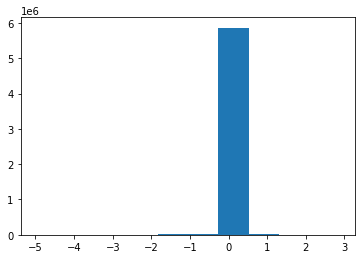

In [ ]:
flat = []
for i in svdObj.zscore.index:
    for j in svdObj.zscore.columns:
        flat.append(svdObj.zscore[j][i])

plt.hist(flat)

In [ ]:
rows, cols = ratings.shape
flat =[]
flat1 = []
z = svdObj.zscore
for i in range(rows):
    row = ratings.loc[i]
    flat.append(z[str(int(row['movieId']))][int(row['userId'])])
    flat1.append(row['rating'])


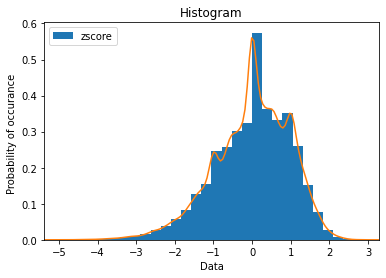

In [ ]:
import scipy.stats as st
plt.hist(flat, density=True, bins=30,label="zscore")
mn,mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 151)
kde = st.gaussian_kde(flat)
plt.plot(kde_xs, kde.pdf(kde_xs))
plt.legend(loc="upper left")
plt.ylabel('Probability of occurance ')
plt.xlabel('Data')
plt.title("Histogram");

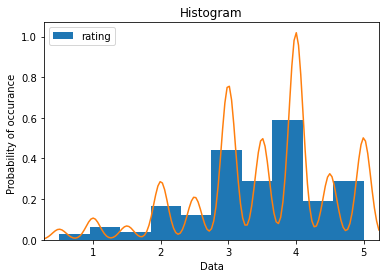

In [ ]:
plt.hist(flat1, density=True,label="rating")
mn,mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 151)
kde = st.gaussian_kde(flat1)
plt.plot(kde_xs, kde.pdf(kde_xs))
plt.legend(loc="upper left")
plt.ylabel('Probability of occurance ')
plt.xlabel('Data')
plt.title("Histogram");

ValueError: ignored

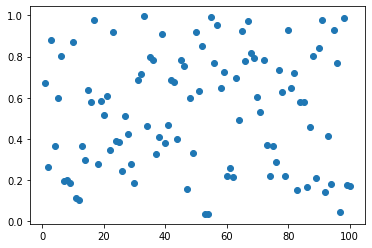

In [ ]:
x = np.random.rand(100)

plt.scatter(range(1,101), x)

m = NearestNeighbors(n_neighbors= 10)
m.fit([x])

k = m.kneighbors([[0.25]], n_neighbors=1)